# Pipeline para la segmentación de las células en 2D

En este caso segmentaremos tres secciones de tres células clasificadas como 3/3: Femur 4, points 10; Humerus 6, points 3; y Femur 7, points 6

In [63]:
import os
import skimage.io
import pandas as pd
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import numpy as np
import skimage.filters
from skimage.morphology import erosion, dilation, opening, closing

# Nota: ypos y xpos son las coordenadas proporcionadas por la investigadora experimentada. surrpix es el tamaño en píxeles que tomamos desde el centro de la imagen hasta cada uno de sus lados
def hsc_segmentation(folder, choice, xpos, ypos, surrpix, threshold_method):
    red_vector = [0] * 3
    blue_vector = [0] * 3
    white_vector = [0] * 3
    segmented_choice = [0] * 3
    j = 0
    k = 0
    m = 0
    for i in os.listdir(folder):
        if "red" in i:
            img_now = skimage.io.imread(folder + i)
            red_vector[j] = img_now[(ypos-surrpix):(ypos+surrpix),(xpos-surrpix):(xpos+surrpix)]
            j += 1
        if "white" in i:
            img_now = skimage.io.imread(folder + i)
            white_vector[k] = img_now[(ypos-surrpix):(ypos+surrpix),(xpos-surrpix):(xpos+surrpix)]
            k += 1
        if "blue" in i:
            img_now = skimage.io.imread(folder + i)
            blue_vector[m] = img_now[(ypos-surrpix):(ypos+surrpix),(xpos-surrpix):(xpos+surrpix)]
            m += 1
    i = 7
    i2 = 5
    SE = (np.mgrid[:i,:i][0] - np.floor(i/2))**2 + (np.mgrid[:i,:i][1] - np.floor(i/2))**2 <= np.floor(i/2)**2
    SE2 = (np.mgrid[:i2,:i2][0] - np.floor(i2/2))**2 + (np.mgrid[:i2,:i2][1] - np.floor(i2/2))**2 <= np.floor(i2/2)**2
    if choice == "red":
        vector_choice = red_vector
    if choice == "blue":
        vector_choice = blue_vector
    if choice == "white":
        vector_choice = blue_vector
    for l in range(0, len(vector_choice),1):
        gauss_mask = ndi.gaussian_filter(vector_choice[l], 1)
        dilated_mask = dilation(gauss_mask, selem=SE)
        eroded_mask = erosion(dilated_mask, selem=SE2)
        if threshold_method == "otsu":
            thresh = threshold_otsu(eroded_mask)
            segmented = eroded_mask > thresh
        if threshold_method == "li":
            thresh = threshold_li(eroded_mask)
            segmented = eroded_mask > thresh
        segmented_choice[l] = segmented
    plt.figure(figsize=(20,10))
    plt.subplot(2,3,1)
    plt.imshow(vector_choice[0],cmap="gray")
    plt.subplot(2,3,2)
    plt.imshow(vector_choice[1],cmap="gray")
    plt.subplot(2,3,3)
    plt.imshow(vector_choice[2],cmap="gray")
    plt.subplot(2,3,4)
    plt.imshow(segmented_choice[0],cmap="gray")
    plt.subplot(2,3,5)
    plt.imshow(segmented_choice[1],cmap="gray")
    plt.subplot(2,3,6)
    plt.imshow(segmented_choice[2],cmap="gray")
    plt.show()

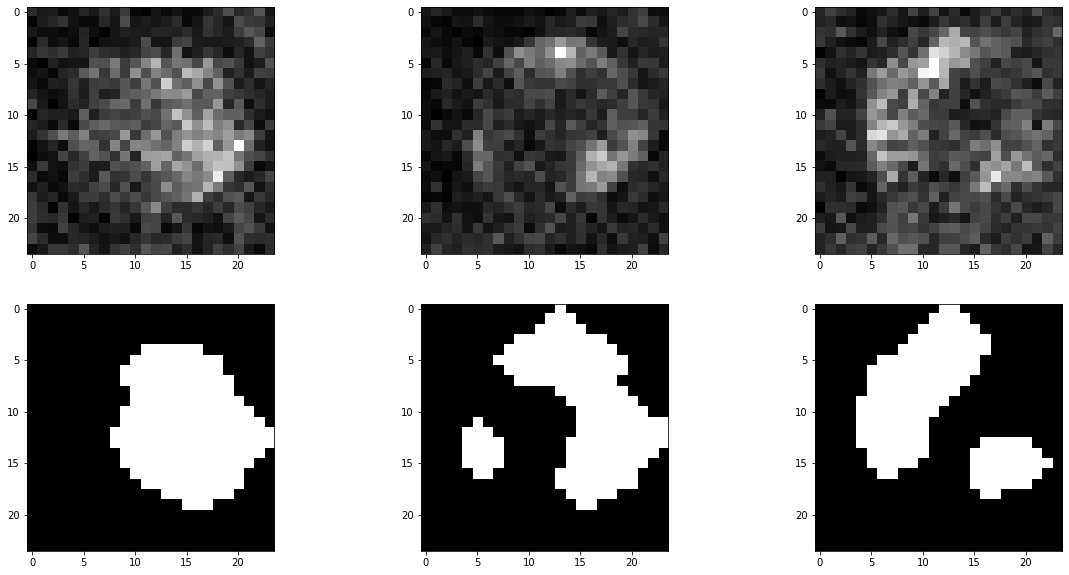

In [64]:
hsc_segmentation("C:/Users/cdedi/Desktop/Sample/Femur 4 points 10/", "red", 547, 855, 12, "otsu")

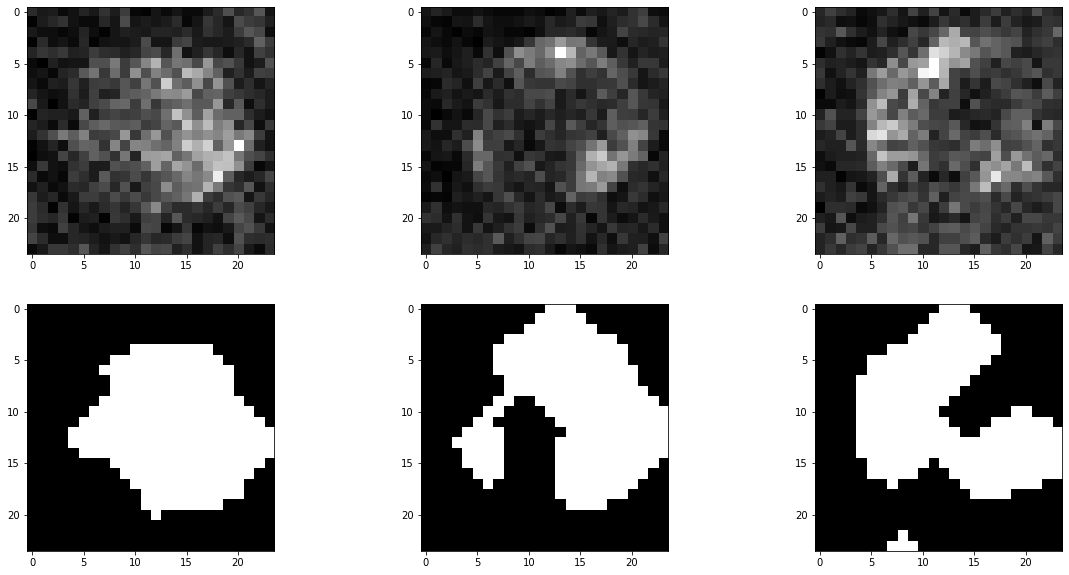

In [67]:
hsc_segmentation("C:/Users/cdedi/Desktop/Sample/Femur 4 points 10/", "red", 547, 855, 12, "li")

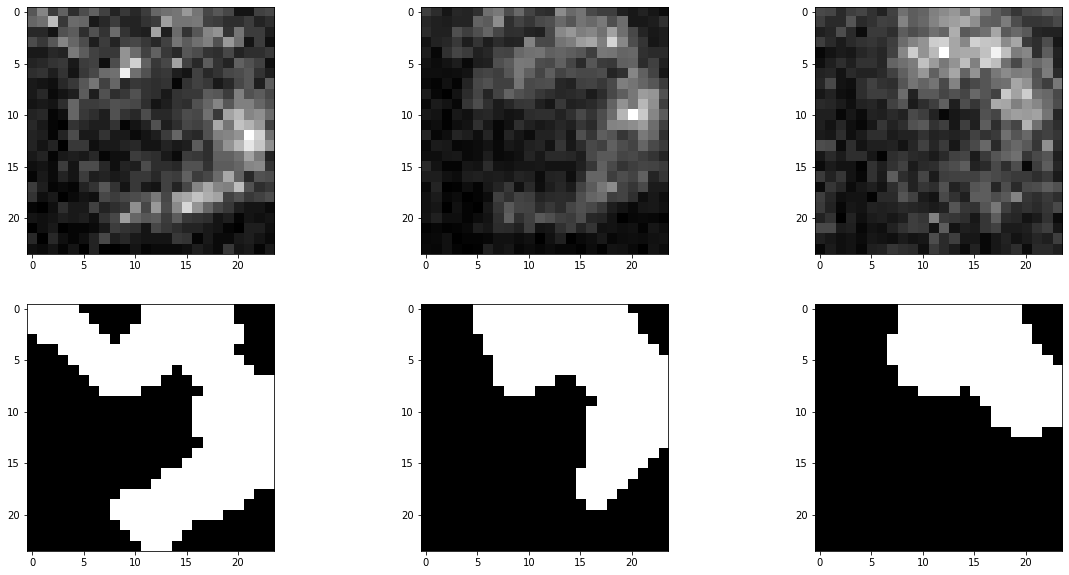

In [68]:
hsc_segmentation("C:/Users/cdedi/Desktop/Sample/Humerus 6 points 3/", "red", 420, 144, 12, "otsu")

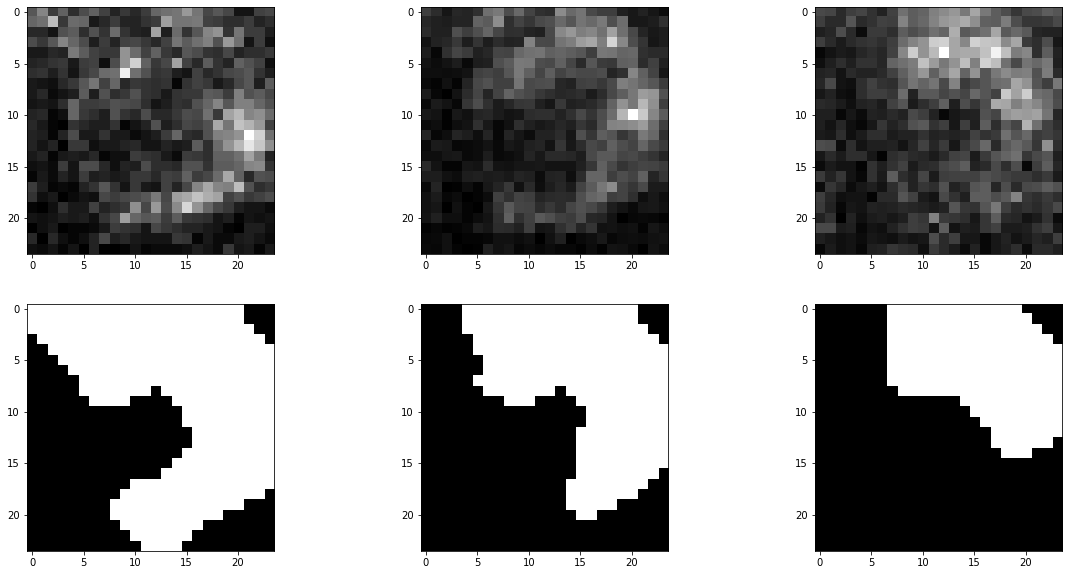

In [69]:
hsc_segmentation("C:/Users/cdedi/Desktop/Sample/Humerus 6 points 3/", "red", 420, 144, 12, "li")

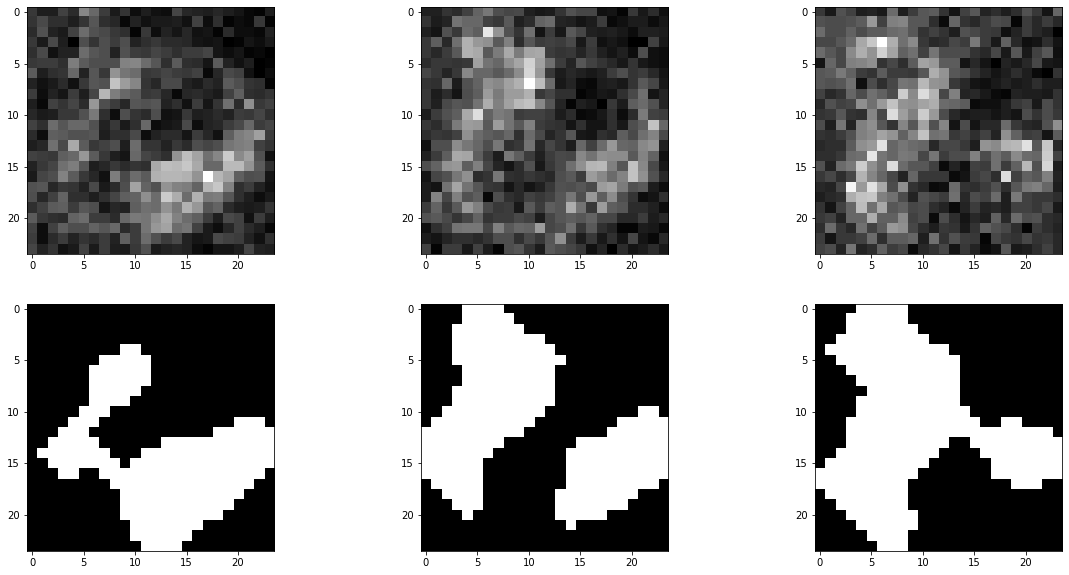

In [70]:
hsc_segmentation("C:/Users/cdedi/Desktop/Sample/Femur 7 points 6/", "red", 939, 688, 12, "otsu")

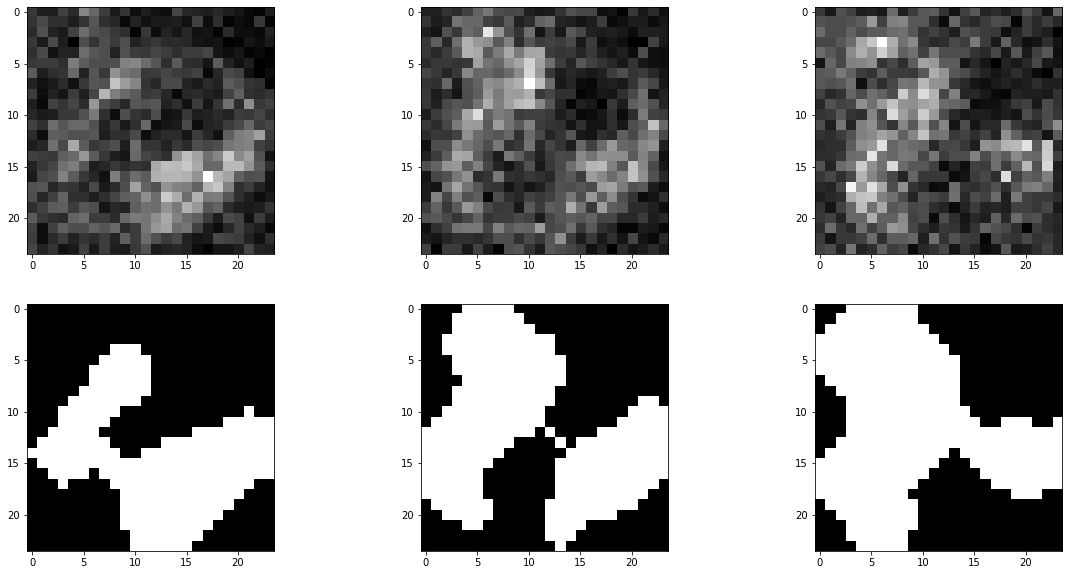

In [71]:
hsc_segmentation("C:/Users/cdedi/Desktop/Sample/Femur 7 points 6/", "red", 939, 688, 12, "li")